In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
csv_file = 'dataSet.csv'

In [3]:
column_name = []
for i in range(1000):
    column_name.append(i)

In [4]:
facebook_datafile = pd.read_csv(csv_file, names=column_name )

In [5]:
facebook_datafile.shape

(8, 1000)

In [6]:
facebook_datafile

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3972.0,6726.0,5629.0,6890,730,6557.0,2022.0,76.0,8463.0,8647.0,...,1364.0,3966.0,3366.0,5042.0,5.0,732.0,8277.0,126.0,7747.0,5471.0
1,28.0,-29.0,95.0,-59,26,22.0,-26.0,-76.0,-95.0,-11.0,...,27.0,60.0,49.0,-80.0,60.0,-97.0,-19.0,52.0,60.0,-25.0
2,28.0,66.0,-131.0,-157,-140,-103.0,-114.0,73.0,-193.0,-28.0,...,98.0,-43.0,96.0,-138.0,-78.0,-1.0,-180.0,29.0,-77.0,41.0
3,-28.0,-31.0,102.0,44,-18,-85.0,52.0,23.0,-89.0,-78.0,...,92.0,93.0,-25.0,33.0,-88.0,-59.0,-91.0,-6.0,-73.0,96.0
4,101.0,464.0,315.0,203,180,298.0,-192.0,350.0,445.0,-195.0,...,337.0,336.0,-183.0,415.0,366.0,35.0,271.0,12.0,459.0,3.0
5,-66.0,44.0,-6.0,26,93,-36.0,-84.0,64.0,-28.0,20.0,...,-77.0,-94.0,-88.0,-36.0,59.0,-35.0,23.0,95.0,32.0,3.0
6,-57.0,53.0,83.0,77,15,28.0,82.0,-13.0,-42.0,28.0,...,-48.0,92.0,37.0,-84.0,-55.0,85.0,1.0,79.0,53.0,-99.0
7,424.2,888.6,281.9,408,-174,562.7,4.2,117.6,507.3,914.7,...,192.4,309.6,590.6,111.2,-122.5,215.2,559.7,155.6,746.7,434.1


In [7]:
temp_num = np.array(facebook_datafile)

In [8]:
temp_num.shape

(8, 1000)

In [9]:
facebook_datafile_t=np.transpose(temp_num)

In [10]:
facebook_datafile_t.shape

(1000, 8)

In [11]:
facebook_datafile = pd.DataFrame(facebook_datafile_t)

In [12]:
facebook_datafile.head()

,0,1,2,3,4,5,6,7
0,3972.0,28.0,28.0,-28.0,101.0,-66.0,-57.0,424.2
1,6726.0,-29.0,66.0,-31.0,464.0,44.0,53.0,888.6
2,5629.0,95.0,-131.0,102.0,315.0,-6.0,83.0,281.9
3,6890.0,-59.0,-157.0,44.0,203.0,26.0,77.0,408.0
4,730.0,26.0,-140.0,-18.0,180.0,93.0,15.0,-174.0


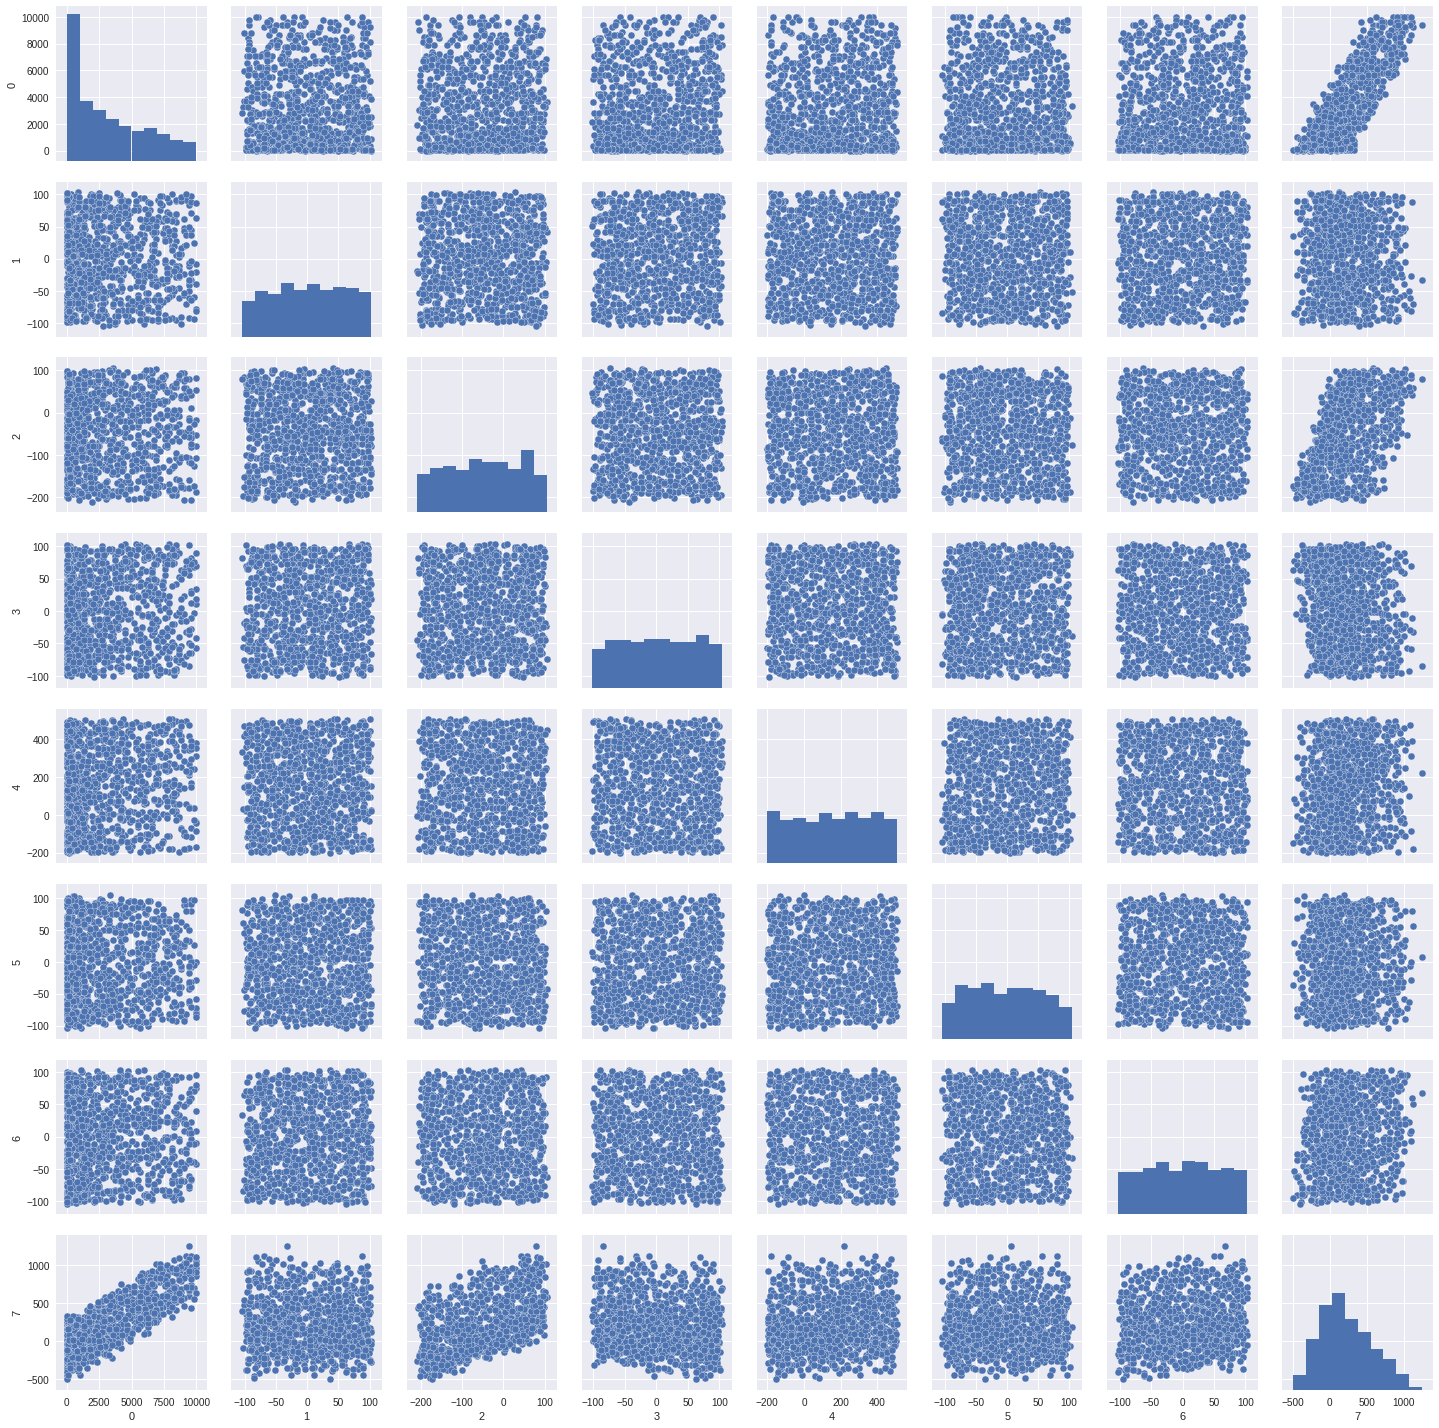

In [13]:
g = sns.pairplot(facebook_datafile)

In [14]:
facebook_data = pd.DataFrame(facebook_datafile.drop([7], axis=1))

In [15]:
facebook_data.shape

(1000, 7)

In [16]:
facebook_data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [17]:
facebook_target = pd.DataFrame(facebook_datafile.drop([0,1,2,3,4,5,6], axis=1))

In [18]:
facebook_target.columns

Int64Index([7], dtype='int64')

In [19]:
facebook_fl = pd.DataFrame(facebook_data[0])
facebook_fl['result'] = facebook_target[7]

In [20]:
facebook_fl.head()

,0,result
0,3972.0,424.2
1,6726.0,888.6
2,5629.0,281.9
3,6890.0,408.0
4,730.0,-174.0


In [21]:
from sklearn import linear_model

In [22]:
X_train, X_test,y_train, y_test = train_test_split(facebook_data, facebook_target, test_size=0.33, random_state=42)

In [23]:
X_train.head()

,0,1,2,3,4,5,6
703,120.0,-87.0,-3.0,-26.0,438.0,58.0,-88.0
311,13.0,-11.0,93.0,3.0,-118.0,-85.0,51.0
722,7926.0,-94.0,-137.0,-61.0,473.0,-82.0,-89.0
629,9408.0,-61.0,51.0,-30.0,475.0,-7.0,5.0
0,3972.0,28.0,28.0,-28.0,101.0,-66.0,-57.0


In [145]:
lm_reg = linear_model.LinearRegression()
multi_lm_reg = linear_model.LinearRegression()

In [146]:
lm_reg.fit(X=pd.DataFrame(facebook_fl[0]), y = pd.DataFrame(facebook_fl['result']))
multi_lm_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
print('lm_intercept_: ', lm_reg.intercept_)
print('lm_coef_: ', lm_reg.coef_)
print('multi_lm_intercept_: ', multi_lm_reg.intercept_)
print('multi_lm_coef_: ', multi_lm_reg.coef_)

lm_intercept_:  [-96.97574127]
lm_coef_:  [[ 0.09933266]]
multi_lm_intercept_:  [ -2.04636308e-12]
multi_lm_coef_:  [[  1.00000000e-01  -1.29208752e-16   2.00000000e+00  -1.00000000e+00
    3.28310431e-16   4.17785400e-18   1.00000000e+00]]


In [148]:
prediction = lm_reg.predict(X=pd.DataFrame(facebook_fl[0]))
prediction2 = multi_lm_reg.predict(X_test)

In [149]:
residuals = facebook_target - prediction
residuals2 = y_test - prediction2

In [150]:
residuals.head()

,7
0,126.626434
1,317.464301
2,-180.267776
3,-179.426255
4,-149.537097


In [151]:
residuals2.head()

,7
521,1.904255e-12
737,1.080025e-12
740,-1.705303e-12
660,-1.250555e-12
411,1.392664e-12


In [152]:
SSE = (residuals[7]**2).sum()
SST = ((facebook_target[7]-facebook_target[7].mean())**2).sum()
R_squared = 1 - (SSE/SST)

print('SSE: ', SSE)
print('SST: ', SST)
print('R_squared: ', R_squared)

SSE:  37257228.29693287
SST:  119928303.61195989
R_squared:  0.6893374860242968


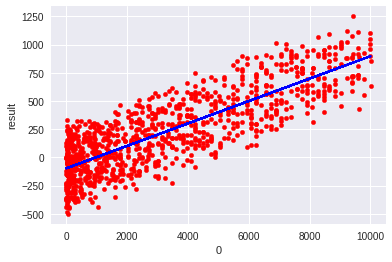

In [154]:
import matplotlib.pyplot as plt

plt.figure("linear_model")
facebook_fl.plot(kind="scatter", x=0, y="result", color="red")
plt.plot(facebook_fl[0], prediction, color="blue")
plt.show()